In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for better interactive visualization
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

In [5]:
files=os.listdir('D:\DAP\Datasets\Covid-19')
files

['country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv',
 'full_grouped.csv',
 'usa_country_wise.csv',
 'worldometer_data.csv']

In [7]:
def read_data(path,filename):
    return pd.read_csv(path+'/'+filename)
    

In [9]:
path='D:\DAP\Datasets\Covid-19'
world_data=read_data(path,'worldometer_data.csv')

In [11]:
day_wise=read_data(path,files[2])

In [13]:
group_data=read_data(path,files[3])

In [15]:
usa_data=read_data(path,files[4])

In [17]:
province_data=read_data(path,files[1])

#### Which Country has maximum Total cases, Deaths, Recovered & active cases 
#### lets create TreeMap Representation of our data

In [20]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

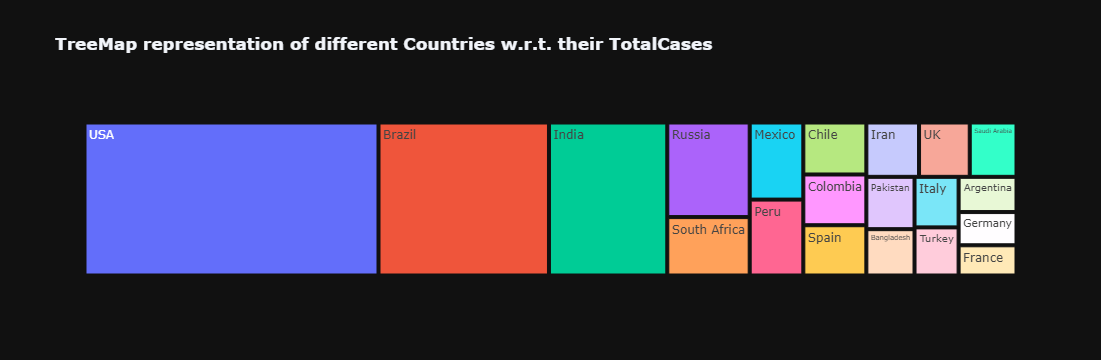

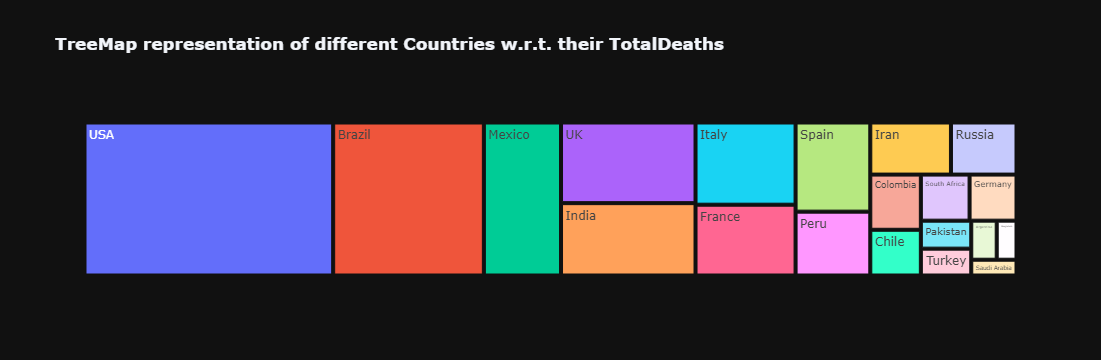

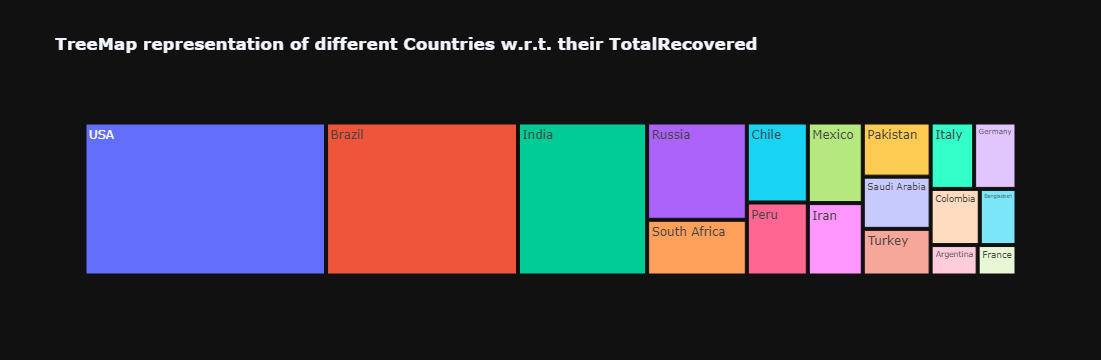

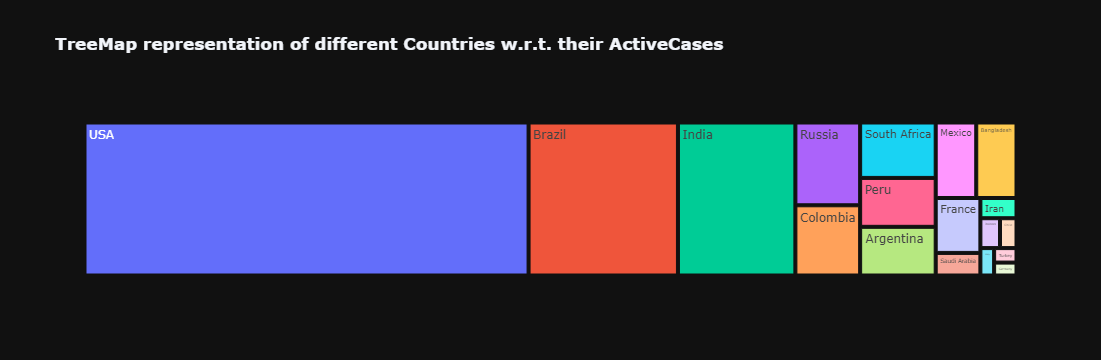

In [22]:
columns=['TotalCases','TotalDeaths','TotalRecovered','ActiveCases']
for i in columns:
    fig=px.treemap(world_data[0:20],values=i,path=['Country/Region'],template="plotly_dark",title="<b>TreeMap representation of different Countries w.r.t. their {}</b>".format(i))
    fig.show()

### what is the trend of Confirmed Deaths Recovered Active cases

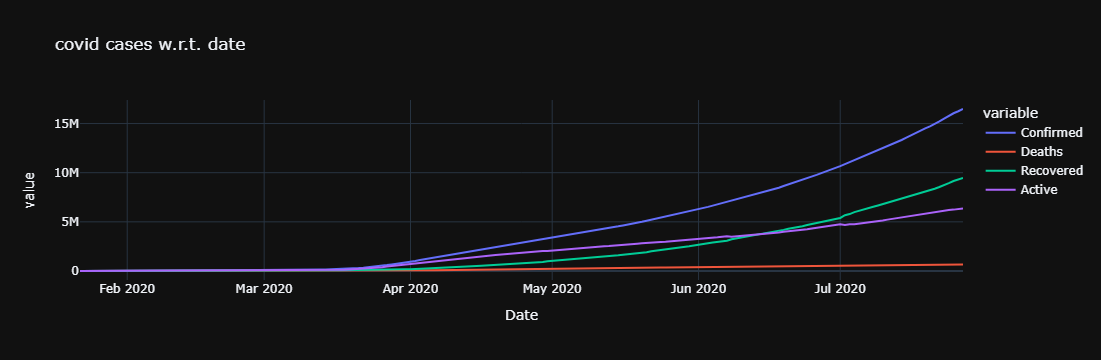

In [25]:
fig=px.line(day_wise,x="Date",y=["Confirmed","Deaths","Recovered","Active"],title="covid cases w.r.t. date",template="plotly_dark")
fig.show()

### find 20 most effected countries

In [28]:
pop_test_ratio=world_data.iloc[0:20]['Population']/world_data.iloc[0:20]['TotalTests']

In [30]:
pop_test_ratio

0       5.245489
1      16.106896
2      62.365033
3       4.911040
4      18.852446
5     122.115932
6      13.241331
7      10.866949
8      28.269105
9       6.618696
10     32.187237
11      3.877883
12      9.589865
13    107.484026
14    134.558952
15      8.514790
16     16.613857
17     56.934398
18      9.760649
19     16.353942
dtype: float64

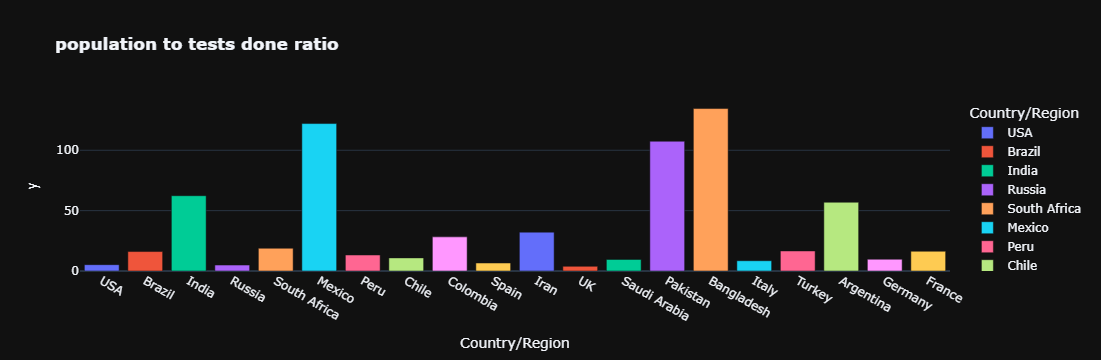

In [32]:
fig=px.bar(world_data.iloc[0:20],color='Country/Region',y=pop_test_ratio,x='Country/Region',template="plotly_dark",title="<b>population to tests done ratio</b>")
fig.show()

### 20 countries that are badly affected by corona 

In [35]:
fig=px.bar(world_data.iloc[0:20],x='Country/Region',y=['Serious,Critical','TotalDeaths','TotalRecovered','ActiveCases','TotalCases'],template="plotly_dark")


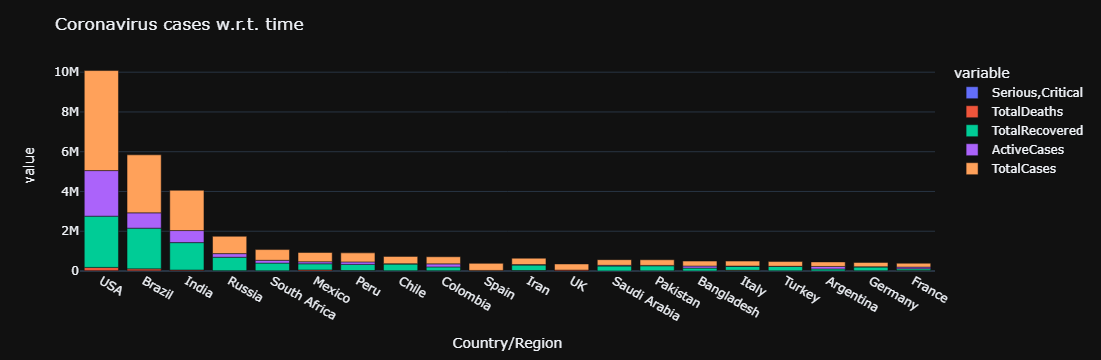

In [37]:
fig.update_layout({'title':"Coronavirus cases w.r.t. time"})
fig.show()

#### Top 20 countries of Total Confirmed Cases, Total Recovered Cases, Total Deaths,Total Active Cases

In [40]:
world_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

In [42]:
world_data['Country/Region'].nunique()

209

### Top 20 countries of Total Confirmed cases

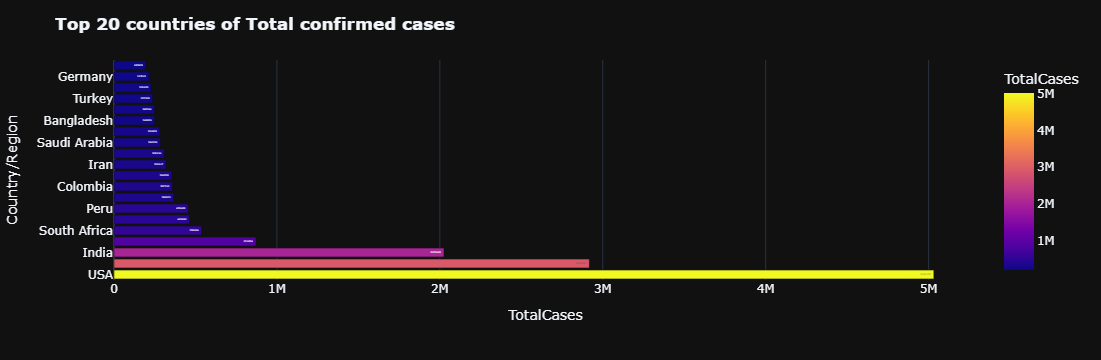

In [45]:
fig=px.bar(world_data.iloc[0:20],y='Country/Region',x='TotalCases',color='TotalCases',text="TotalCases")
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total confirmed cases</b>")
fig.show()

### Top 20 countries of Total deaths

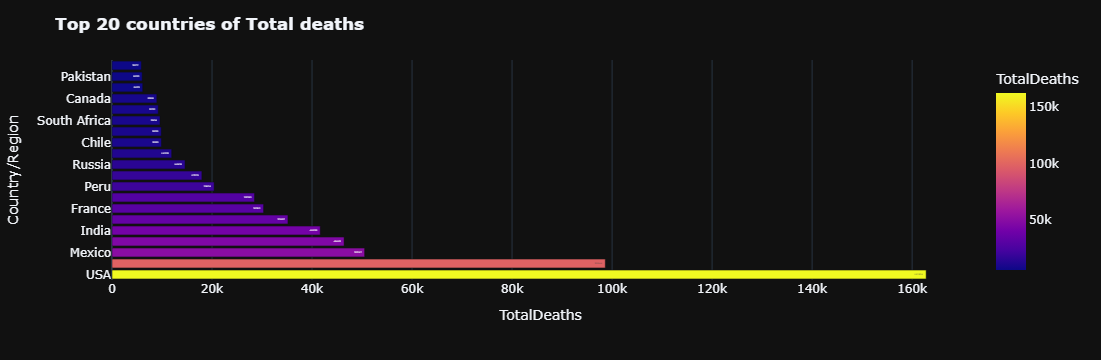

In [48]:
fig=px.bar(world_data.sort_values(by='TotalDeaths',ascending=False)[0:20],y='Country/Region',x='TotalDeaths',color='TotalDeaths',text="TotalDeaths")
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total deaths</b>")
fig.show()

### Top 20 countries of Total active cases

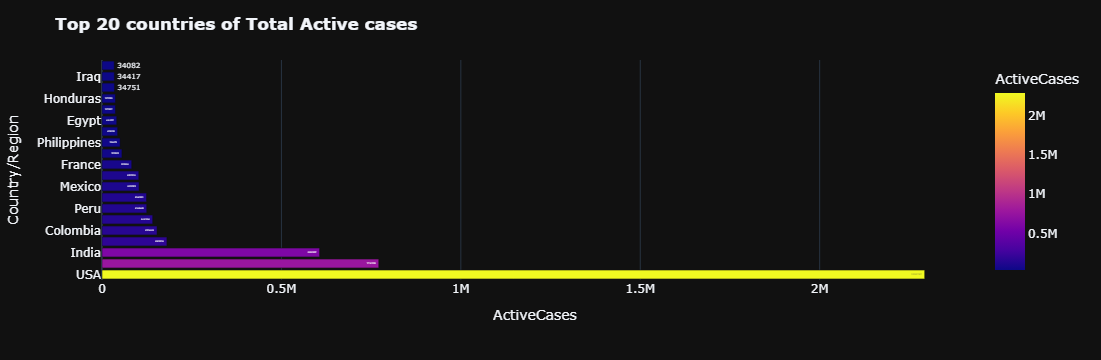

In [51]:
fig=px.bar(world_data.sort_values(by='ActiveCases',ascending=False)[0:20], y='Country/Region',x='ActiveCases',color='ActiveCases',text='ActiveCases')
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total Active cases")
fig.show()

### Top 20 countries of Total Recoveries

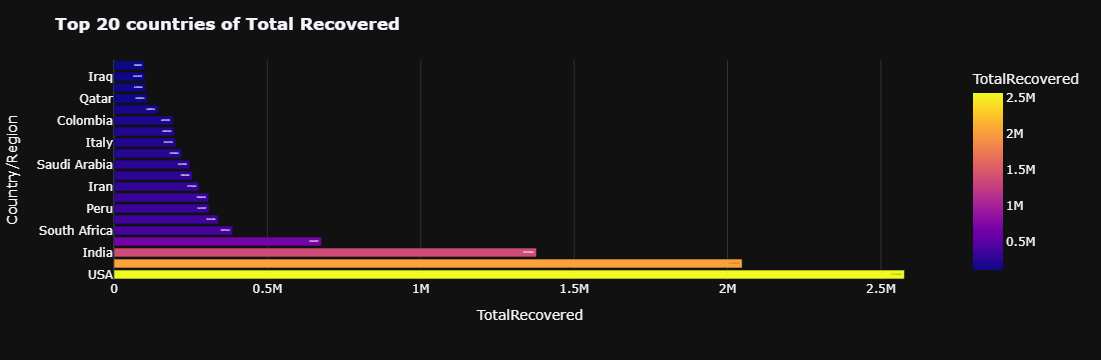

In [54]:
fig=px.bar(world_data.sort_values(by='TotalRecovered',ascending=False)[:20],y='Country/Region',x='TotalRecovered',color='TotalRecovered',text='TotalRecovered')
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total Recovered")
fig.show()

In [56]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [58]:
world_data[0:15]['Country/Region'].values

array(['USA', 'Brazil', 'India', 'Russia', 'South Africa', 'Mexico',
       'Peru', 'Chile', 'Colombia', 'Spain', 'Iran', 'UK', 'Saudi Arabia',
       'Pakistan', 'Bangladesh'], dtype=object)

### Pie Chart Representation of stats of worst affected countries

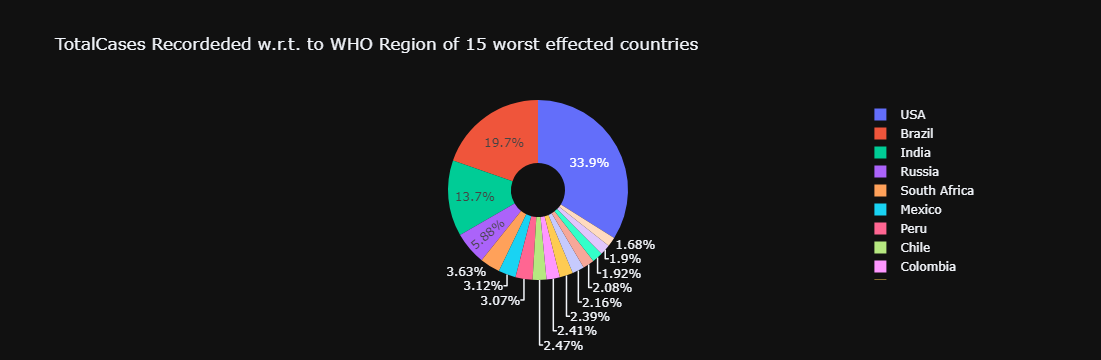

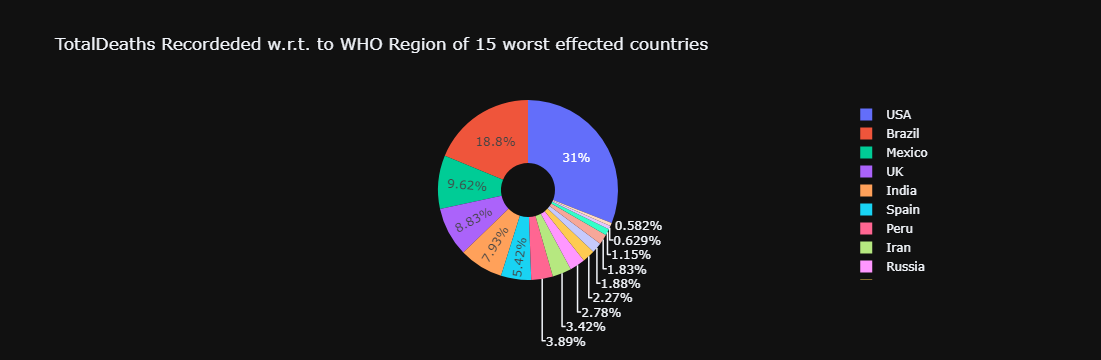

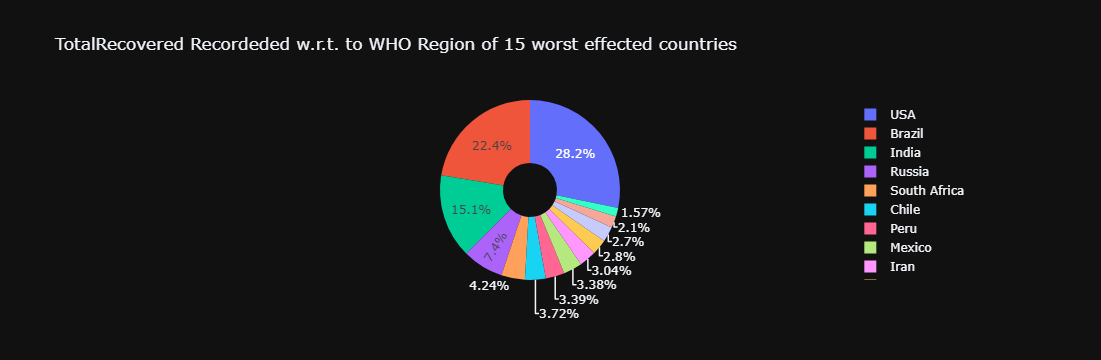

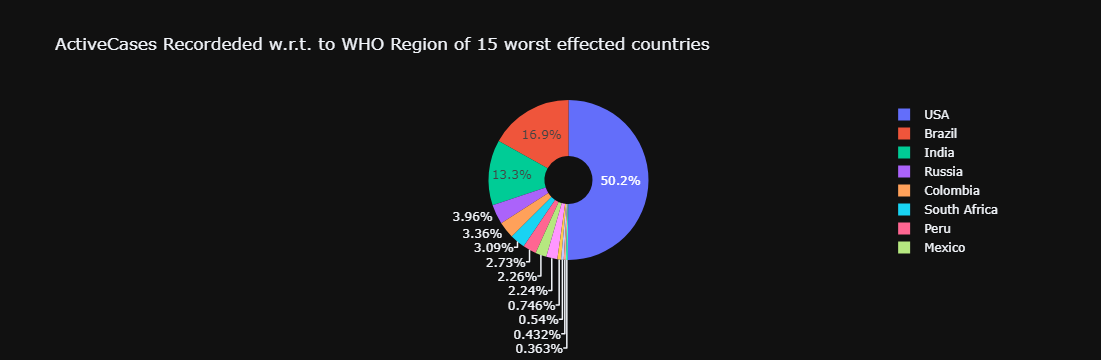

In [61]:
labels=world_data[0:15]['Country/Region'].values
cases=['TotalCases','TotalDeaths','TotalRecovered','ActiveCases']
for i in cases:
    fig=px.pie(world_data[0:15],values=i,names=labels,template="plotly_dark",hole=0.3,title=" {} Recordeded w.r.t. to WHO Region of 15 worst effected countries ".format(i))
    fig.show()

### Deaths to recovered ratio

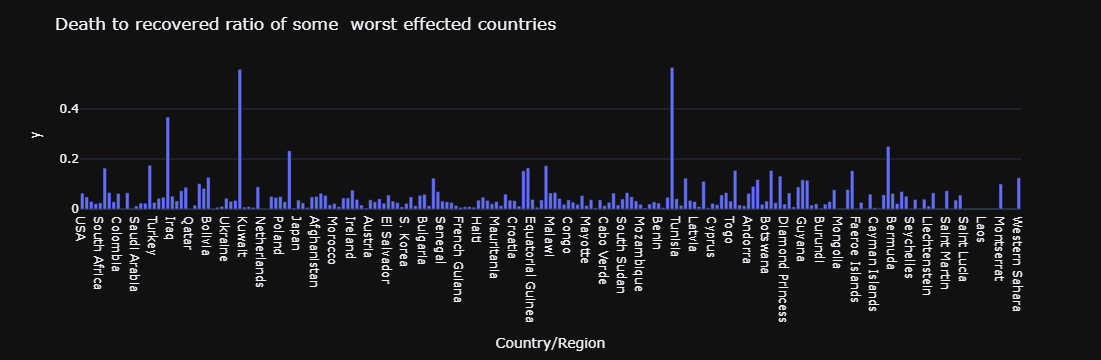

In [64]:
deaths_to_recovered=((world_data['TotalDeaths']/world_data['TotalRecovered']))
fig = px.bar(world_data,x='Country/Region',y=deaths_to_recovered)
fig.update_layout(title={'text':"Death to recovered ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()


### Tests to Confirmed Ratio

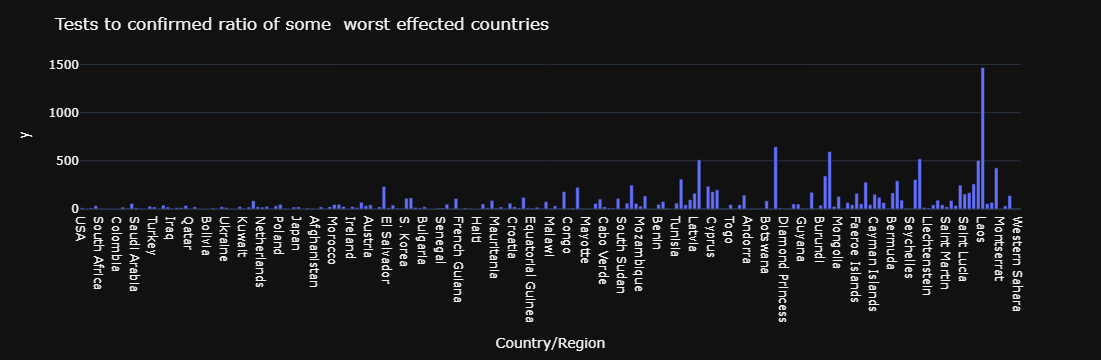

In [67]:
tests_to_confirmed=((world_data['TotalTests']/world_data['TotalCases']))
fig = px.bar(world_data,x='Country/Region',y=tests_to_confirmed)
fig.update_layout(title={'text':"Tests to confirmed ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()

#### Visualize Confirmed,  Active,  Recovered , Deaths Cases(entire statistics ) of a particular country

In [70]:
group_data.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

In [72]:
from plotly.subplots import make_subplots  ## for creating subplots in plotly
import plotly.graph_objects as go

In [74]:

def country_visualization(group_data,country):
    
    data=group_data[group_data['Country/Region']==country]
    df=data.loc[:,['Date','Confirmed','Deaths','Recovered','Active']]
    fig = make_subplots(rows=1, cols=4,subplot_titles=("Confirmed", "Active", "Recovered",'Deaths'))
    fig.add_trace(
        go.Scatter(name="Confirmed",x=df['Date'],y=df['Confirmed']),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(name="Active",x=df['Date'],y=df['Active']),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(name="Recovered",x=df['Date'],y=df['Recovered']),
        row=1, col=3
    )

    fig.add_trace(
        go.Scatter(name="Deaths",x=df['Date'],y=df['Deaths']),
        row=1, col=4
    )

    fig.update_layout(height=600, width=1000, title_text="Date Vs Recorded Cases of {}".format(country),template="plotly_dark")
    fig.show()

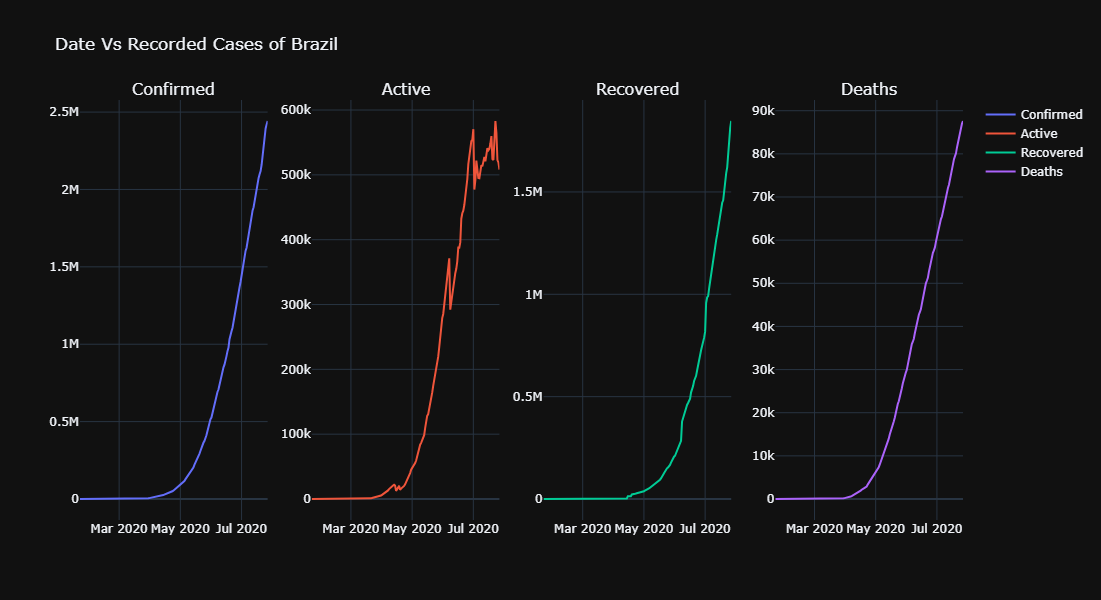

In [76]:
country_visualization(group_data,'Brazil')

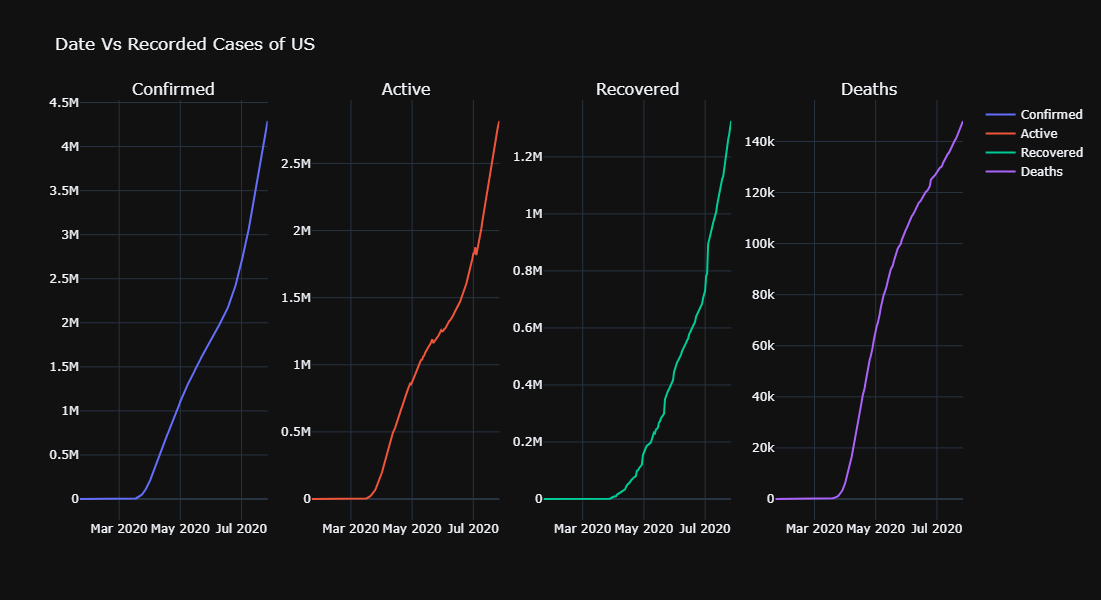

In [78]:
country_visualization(group_data,'US')

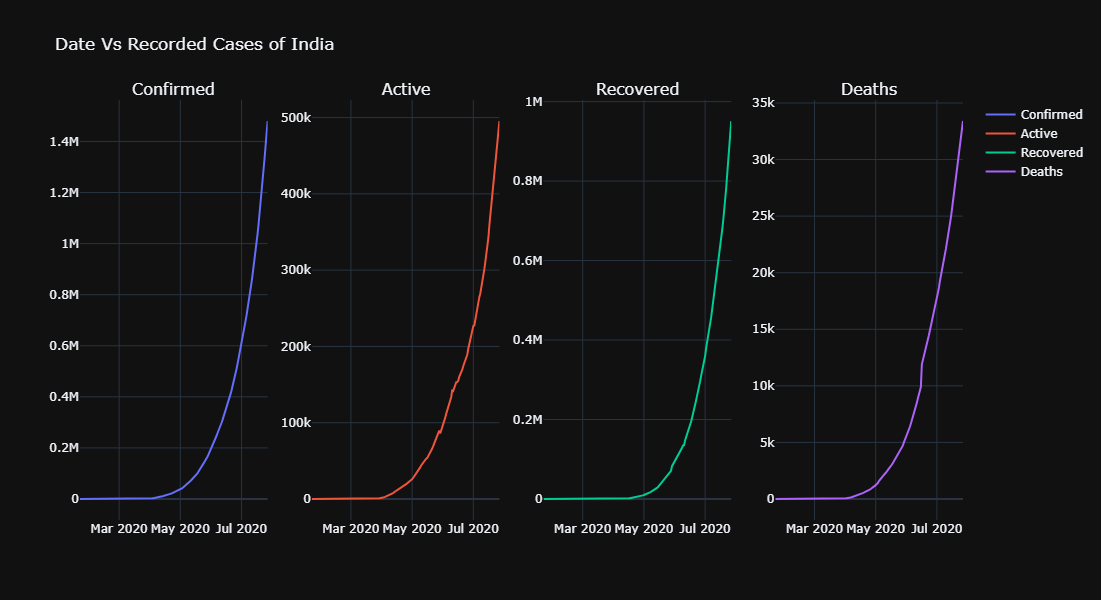

In [80]:
country_visualization(group_data,'India')